# Data Wrangling

In [262]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sqlite3 as sql

In [263]:
# read dataFrame
df = pd.read_csv("df.csv", index_col="Unnamed: 0")

### Columns Manipulation

In [264]:
# "Semestre de ingresso no curso" to "Semestre de ingresso"
df["Semestre de ingresso"] = df["Semestre de ingresso no curso"]
df.drop(columns=["Semestre de ingresso no curso"], inplace=True)

# "Coeficiente de rendimento" to "CR"
df["CR"] = df["Coeficiente de rendimento"]
df.drop(columns=["Coeficiente de rendimento"], inplace=True)

# "Ano de ingresso" and "Semestre de ingresso" to "Ingresso"
df["Ingresso"] = df["Ano de ingresso"] + ((df["Semestre de ingresso"]-1)*0.5)
#df.drop(columns=["Ano de ingresso", "Semestre de ingresso"], inplace=True)

# "Ano" and "Semestre" to "Data"
df["Data"] = df["Ano"] + ((df["Semestre"]-1)*0.5)
df.drop(columns=["Ano", "Semestre"], inplace=True)

# "Mudou de curso - mesmo campus" and "Mudou de curso - outro campus" to "Mudou de Curso"
df["Mudou de curso"] = (df["Mudou de curso - mesmo campus"]=="Sim").astype(int) + 2*(df["Mudou de curso - outro campus"]=="Sim").astype(int)
df.drop(columns=["Mudou de curso - mesmo campus", "Mudou de curso - outro campus"], inplace=True)

# "Forma de ingresso" to "Sisu"
df["Sisu"] = df["Forma de ingresso"] == "SISU - Sistema de Seleção Unificada"

# "Data de nascimento" to "Ano de nascimento"
df["Ano de nascimento"] = df["Data de nascimento"].str[0:4].astype(int)
df.drop(columns=["Data de nascimento"], inplace=True)

# "Data" and "Ano de nascimento" to "Idade"
df["Idade"] = df["Data"].astype(int) - df["Ano de nascimento"]

# "Gênero" to "Mulher"
df["Mulher"] = df["Gênero"] == "Feminino"
df.drop(columns=["Gênero"], inplace=True)

# "Tipo de cota" to "Cotista"
df["Cotista"] = 1 - ((df["Tipo de cota"] == "Não cotista") + (df["Tipo de cota"] == "Sem cotas"))
df.drop(columns=["Tipo de cota"], inplace=True)

# "Data", "Ingresso", "Período" to "Atraso"
df["Atraso"] = 1 + 2*(df["Data"] - df["Ingresso"]) - df["Período"]

# "País de nascimento" to "Brasileiro"
df["Brasileiro"] = df["País de nascimento"] == "Brasil"
df.drop(columns=["País de nascimento"], inplace=True)

# "Cor ou raça" to "Branco"
df["Branco"] = df["Cor ou raça"] == "Branca"
df.drop(columns=["Cor ou raça"], inplace=True)

# "UF" to "Paraná"
df["Paraná"] = df["UF SISU"] == "PR"

# "Cidade" to "Curitiba"
df["Curitiba"] = df["Município SISU"] == "Curitiba"

# "Disciplinas aprovadas", "Disciplinas matriculadas" to "Disciplinas aprov/matr"
df["Disciplinas aprov/matr"] = df["Disciplinas aprovadas"]/df["Disciplinas matriculadas"]

### Complex Columns

In [265]:
# "Disciplinas matriculadas" to "Disciplinas matriculadas acumuladas" using cumsum()
df["Disciplinas matriculadas acumuladas"] = df.sort_values("Data").groupby("Código")["Disciplinas matriculadas"].cumsum()

# "Disciplinas aprovadas" to "Disciplinas aprovadas acumuladas" using cumsum()
df["Disciplinas aprovadas acumuladas"] = df.sort_values("Data").groupby("Código")["Disciplinas aprovadas"].cumsum()

# "Disciplinas reprovadas por nota" to "Disciplinas reprovadas por nota acumuladas" using cumsum()
df["Disciplinas reprovadas por nota acumuladas"] = df.sort_values("Data").groupby("Código")["Disciplinas reprovadas por nota"].cumsum()

# "Disciplinas reprovadas por frequência" to "Disciplinas reprovadas por frequência acumuladas" using cumsum()
df["Disciplinas reprovadas por frequência acumuladas"] = df.sort_values("Data").groupby("Código")["Disciplinas reprovadas por frequência"].cumsum()

# "Disciplinas consignadas" to "Disciplinas consignadas acumuladas" using cumsum()
df["Disciplinas consignadas acumuladas"] = df.sort_values("Data").groupby("Código")["Disciplinas consignadas"].cumsum()

# "Disciplinas aprovadas acumuladas", "Disciplinas matriculadas acumuladas" to "Disciplinas aprov/matr acumuladas"
df["Disciplinas aprov/matr acumuladas"] = df["Disciplinas aprovadas acumuladas"]/df["Disciplinas matriculadas acumuladas"]
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)
df["Disciplinas aprov/matr acumuladas"] = (df["Disciplinas aprov/matr acumuladas"]*100).astype(int)/100
df["Disciplinas aprov/matr acumuladas"] = (df["Disciplinas aprov/matr acumuladas"] > 1) * -1 + (df["Disciplinas aprov/matr acumuladas"] <= 1) * df["Disciplinas aprov/matr acumuladas"]
df.replace(-1, np.nan, inplace=True)



### Droping data


In [266]:
df.dropna(axis=0, subset="CR", inplace=True)

### New Dataframes


In [267]:
# Select the first occurence of each student
first_df = df.sort_values(by=["Código", 'Data'], ascending=True)
first_df.drop_duplicates(subset=['Código'], keep='first', inplace=True)
# Selecting the lasr occurence of each student
last_df = df.sort_values(by=["Código", 'Data'], ascending=True)
last_df.drop_duplicates(subset=['Código'], keep='last', inplace=True)


### Others new Columns

In [268]:
# Column to check if the student ended the course
formados = last_df[last_df["Situação"] == "Formado"]["Código"].to_list()
df["Formou"] = df['Código'].isin(formados)
# Column to check if the student left the course
evadidos = last_df[last_df["Situação"] == "Desistente"]["Código"].to_list()
df["Evadiu"] = df['Código'].isin(evadidos)

In [269]:
# Select the first occurence of each student
first_df = df.sort_values(by=["Código", 'Data'], ascending=True)
first_df.drop_duplicates(subset=['Código'], keep='first', inplace=True)
# Selecting the lasr occurence of each student
last_df = df.sort_values(by=["Código", 'Data'], ascending=True)
last_df.drop_duplicates(subset=['Código'], keep='last', inplace=True)

In [270]:
c = sql.connect("db.db")
df.to_sql("df", con=c, if_exists="replace")
last_df.to_sql("last_df", con=c, if_exists="replace")
first_df.to_sql("first_df", con=c, if_exists="replace")

1355

In [271]:
last_df.describe()

,Ano de ingresso,Código,Disciplinas matriculadas,Disciplinas aprovadas,Disciplinas reprovadas por nota,Disciplinas reprovadas por frequência,Disciplinas consignadas,Período,Semestre de ingresso,CR,...,Idade,Cotista,Atraso,Disciplinas aprov/matr,Disciplinas matriculadas acumuladas,Disciplinas aprovadas acumuladas,Disciplinas reprovadas por nota acumuladas,Disciplinas reprovadas por frequência acumuladas,Disciplinas consignadas acumuladas,Disciplinas aprov/matr acumuladas
count,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,...,1355.000000,1355.000000,1284.000000,773.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1292.000000
mean,2014.906273,700.342435,2.278229,1.499631,0.244280,0.470849,0.506273,4.823616,1.501845,0.537862,...,23.538745,0.439114,3.887072,0.701125,38.777122,26.163838,5.317343,5.329889,11.859041,0.565441
std,4.369991,396.844886,2.584768,2.201911,0.726245,1.384019,2.675273,3.488200,0.500181,0.265776,...,4.115640,0.496462,3.645284,0.420826,29.799437,24.028473,6.613376,8.500306,16.625337,0.325193
min,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,17.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,355.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.365700,...,21.000000,0.000000,1.000000,0.333333,10.000000,4.000000,1.000000,0.000000,1.000000,0.300000
50%,2015.000000,705.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.603500,...,23.000000,0.000000,3.000000,1.000000,33.000000,19.000000,3.000000,2.000000,5.000000,0.640000
75%,2019.000000,1043.500000,5.000000,2.000000,0.000000,0.000000,0.000000,10.000000,2.000000,0.752250,...,26.000000,1.000000,6.000000,1.000000,65.000000,50.000000,8.000000,6.000000,16.000000,0.840000
max,2022.000000,1382.000000,9.000000,9.000000,6.000000,6.000000,45.000000,10.000000,2.000000,0.990400,...,53.000000,1.000000,21.000000,3.000000,125.000000,71.000000,42.000000,85.000000,102.000000,1.000000


<AxesSubplot:>

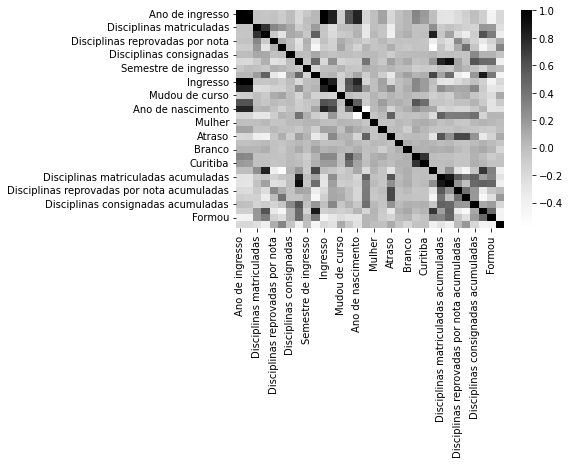

In [272]:
sns.heatmap(df.corr(), cmap="Greys")

In [273]:
df.corr().columns

Index(['Ano de ingresso', 'Código', 'Disciplinas matriculadas',
       'Disciplinas aprovadas', 'Disciplinas reprovadas por nota',
       'Disciplinas reprovadas por frequência', 'Disciplinas consignadas',
       'Período', 'Semestre de ingresso', 'CR', 'Ingresso', 'Data',
       'Mudou de curso', 'Sisu', 'Ano de nascimento', 'Idade', 'Mulher',
       'Cotista', 'Atraso', 'Brasileiro', 'Branco', 'Paraná', 'Curitiba',
       'Disciplinas aprov/matr', 'Disciplinas matriculadas acumuladas',
       'Disciplinas aprovadas acumuladas',
       'Disciplinas reprovadas por nota acumuladas',
       'Disciplinas reprovadas por frequência acumuladas',
       'Disciplinas consignadas acumuladas',
       'Disciplinas aprov/matr acumuladas', 'Formou', 'Evadiu'],
      dtype='object')